## Step 1: 데이터 준비

In [3]:
import os

dir = os.getcwd()
print(dir)

C:\Users\이나라pc\supercoding\1stProject


In [4]:
import pandas as pd
import numpy as np
import zipfile
import os

# 상위 폴더에 있는 zip 파일 경로
zip_path = os.path.join('C:/Users/이나라pc/supercoding', "Imdb.zip")  

with zipfile.ZipFile(zip_path) as z:
    # zip 안에 뭐 들어있는지 먼저 확인
    print(z.namelist())


    with z.open("imdb_top_1000.csv") as f:
        df = pd.read_csv(f)

df.head()

['imdb_top_1000.csv']


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### 데이터 셋 주요 컬럼 및 특징

| 컬럼명           | 설명                 |
| ------------- | ------------------ |
| Poster_Link   | IMDb에서 사용하는 포스터 링크 |
| Series_Title  | 영화 제목              |
| Released_Year | 영화 개봉 연도           |
| Certificate   | 영화 등급(관람등급/인증)     |
| Runtime       | 영화 러닝타임(총 상영 시간)   |
| Genre         | 영화 장르              |
| IMDB_Rating   | IMDb 평점            |
| Overview      | 줄거리/요약             |
| Meta_score    | 메타스코어(평론가 점수)      |
| Director      | 감독 이름              |
| Star1         | 주연 배우 1            |
| Star2         | 주연 배우 2            |
| Star3         | 주연 배우 3            |
| Star4         | 주연 배우 4            |
| No_of_votes   | 총 투표 수             |
| Gross         | 영화 수익(매출)          |


In [63]:
print('데이터 개수: ')
df['Series_Title'].nunique() 

데이터 개수: 


999

## Step 2: 기본적인 데이터 탐색

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.describe(include = 'all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [8]:
df['Genre'].value_counts(normalize = True).head(10) #상위 장르 10개 빈도 파악

Genre
Drama                           0.085
Drama, Romance                  0.037
Comedy, Drama                   0.035
Comedy, Drama, Romance          0.031
Action, Crime, Drama            0.030
Biography, Drama, History       0.028
Crime, Drama, Thriller          0.028
Crime, Drama, Mystery           0.027
Crime, Drama                    0.026
Animation, Adventure, Comedy    0.024
Name: proportion, dtype: float64

## Step 3: 평점이 높은 영화 찾기

In [10]:
top5 = df.nlargest(5, 'IMDB_Rating') # 평점 높은 영화 5개 출력
top5[['Series_Title', 'IMDB_Rating', 'Genre']]  # 평점 상위 5위 영화 중 해당 컬럼 정보만 출력하도록 인덱싱

,Series_Title,IMDB_Rating,Genre
0,The Shawshank Redemption,9.3,Drama
1,The Godfather,9.2,"Crime, Drama"
2,The Dark Knight,9.0,"Action, Crime, Drama"
3,The Godfather: Part II,9.0,"Crime, Drama"
4,12 Angry Men,9.0,"Crime, Drama"


In [11]:
#단일 장르로 분리
genre_df = df.copy().assign(Genre = lambda x : x['Genre'].str.split(r',\s*')).explode('Genre').drop_duplicates(['Series_Title', 'Released_Year', 'Genre'])

# 장르별 비중 파악 
Genre_ratio = genre_df['Genre'].value_counts(normalize=True).rename_axis('Single genre').reset_index(name='비중') #rename.axis -> 축이름 지정

Genre_ratio



,Single genre,비중
0,Drama,0.284927
1,Comedy,0.091696
2,Crime,0.082251
3,Adventure,0.077135
4,Action,0.074380
5,Thriller,0.053916
6,Romance,0.049193
7,Biography,0.042896
8,Mystery,0.038961
9,Animation,0.032271


D:\cpp_temp\ipykernel_23144\2140439252.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=PGenre, x='Genre', y='ratio', palette='coolwarm')


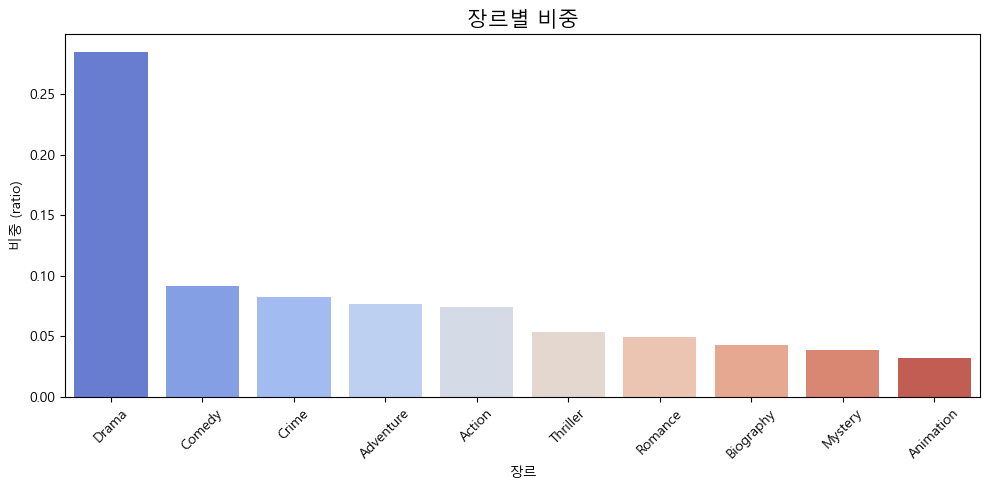

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

PGenre = genre_df['Genre'].value_counts(normalize=True).reset_index(name = 'ratio' ).head(10)

plt.figure(figsize=(10, 5))
rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(data=PGenre, x='Genre', y='ratio', palette='coolwarm')

plt.title('장르별 비중', size = 15)
plt.ylabel('비중 (ratio)', size = 10)
plt.xlabel('장르', size = 10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 주요 장르는 단일 장편/단편 영화,코미디, 범죄, 어드벤쳐순 장르 영화보다는 단순 영화 비중이 큰 점이 눈에 띔

## Step 4: 장르별 평균 평점 분석

In [15]:
genre_mean = genre_df.groupby('Genre')['IMDB_Rating'].mean().reset_index(name = 'mean_rating')
genre_mean 

,Genre,mean_rating
0,Action,7.948677
1,Adventure,7.952041
2,Animation,7.930488
3,Biography,7.935780
4,Comedy,7.903433
5,Crime,7.954545
6,Drama,7.959392
7,Family,7.912500
8,Fantasy,7.931818
9,Film-Noir,7.989474


## Step 5: 연도별 평점 변화 분석

In [61]:
year_mean = (
    genre_df
    .drop_duplicates(["Series_Title", "Released_Year", "Genre"])
    .groupby("Released_Year")["IMDB_Rating"]
    .mean()
    .sort_index(ascending=False)
)

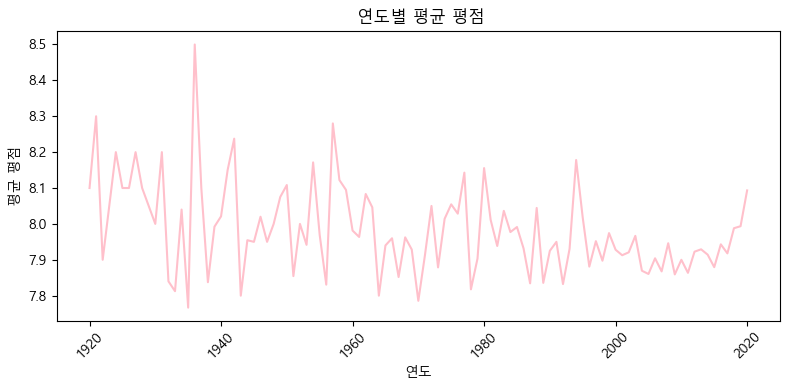

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.figure(figsize=(8, 4))
rcParams['font.family'] = 'Malgun Gothic'

year_mean.plot(kind = 'line',color = 'pink')

plt.title(' 연도별 평균 평점')
plt.ylabel('평균 평점')
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 평론가 VS 시청자 주요 장르 평점 및 화제성 파악

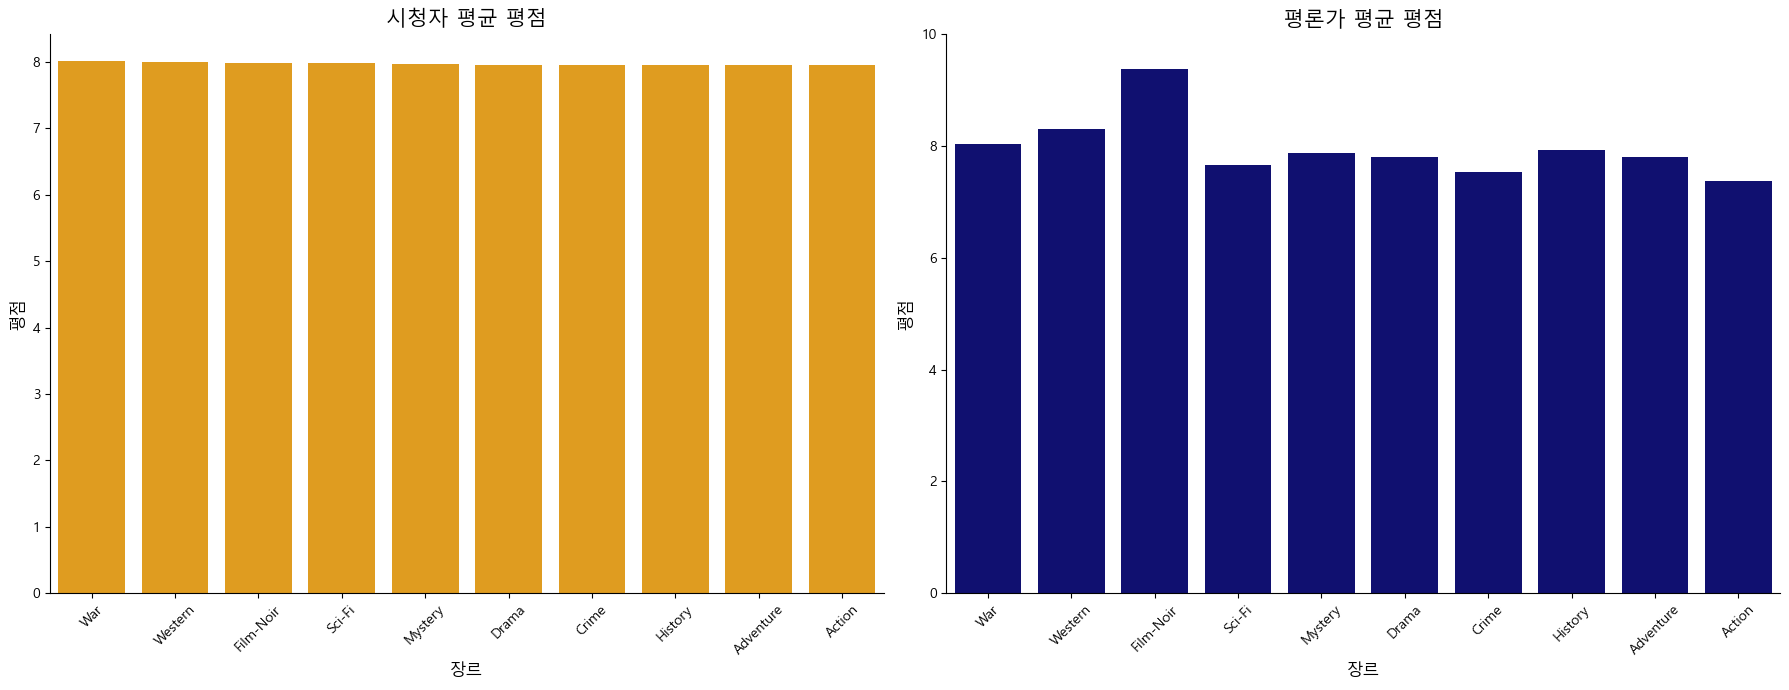

In [16]:
# 시청자(유저) 장르 평균 
viewer_mean = (
    genre_df.groupby('Genre', as_index=False)['IMDB_Rating']
    .mean()
    .rename(columns={'IMDB_Rating':'mean_viewer_rating'})
)

# 평론가 장르 평균
critics_mean = (
    genre_df.groupby('Genre', as_index=False)['Meta_score']
    .mean()
    .rename(columns={'Meta_score':'mean_critics_rating'})
)

# merge
compare = viewer_mean.merge(critics_mean, on='Genre', how='inner')
compare['mean_critics_rating_10'] = compare['mean_critics_rating'] / 10 # 평론가 펼점 10점만 기준으로 재계산

# Top10 기준
top10_genres = compare.sort_values('mean_viewer_rating', ascending=False).head(10)['Genre']
plot_df = compare[compare['Genre'].isin(top10_genres)].copy()
plot_df = plot_df.sort_values('mean_viewer_rating', ascending=False)

# subplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['font.family'] = 'Malgun Gothic'
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

sns.barplot(data=plot_df, x='Genre', y='mean_viewer_rating', ax=axes[0], color = 'orange')
axes[0].set_title('시청자 평균 평점', size = 15)
axes[0].set_xlabel('장르', size = 12)
axes[0].set_ylabel('평점', size = 12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=plot_df, x='Genre', y='mean_critics_rating_10', ax=axes[1],color = 'navy')
axes[1].set_title('평론가 평균 평점', size = 15)
axes[1].set_xlabel('장르', size = 12)
axes[1].set_ylabel('평점', size = 12)
axes[1].tick_params(axis='x', rotation=45)


plt.ylim(0, 10) # 척도 고정

# 불필요한 테두리 제거 (Despine)
sns.despine()

plt.tight_layout()
plt.show()


In [17]:
genre_comparison_df = (
    (genre_df.groupby('Genre')
        .agg(Mean_rate = ('IMDB_Rating','mean'),
            Total_votes = ('No_of_Votes','sum')
            )
    )
        .sort_values(
        by='Mean_rate',
        ascending=False
    )
)
print('-' * 20)
print('상위 5개 장르: \n',genre_comparison_df.head(5) )
print('-' * 20)
print('하위 5개 장르: \n',genre_comparison_df.tail(5) )

--------------------
상위 5개 장르: 
            Mean_rate  Total_votes
Genre                            
War         8.013725      9906470
Western     8.000000      4589516
Film-Noir   7.989474      1523519
Sci-Fi      7.977612     37268246
Mystery     7.967677     29052873
--------------------
하위 5개 장르: 
           Mean_rate  Total_votes
Genre                           
Music      7.914286      4874859
Family     7.912500     12514438
Thriller   7.909489     41106952
Comedy     7.903433     52533570
Horror     7.887500      6971540


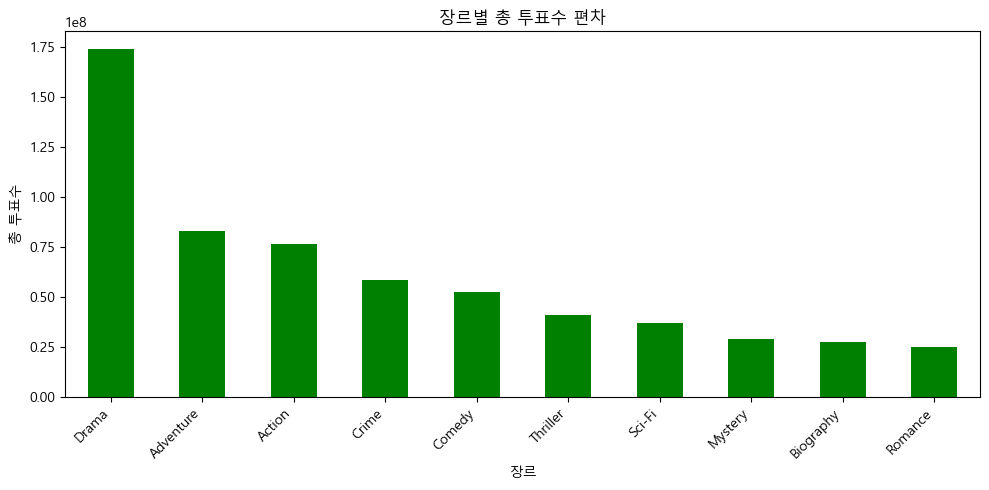

In [20]:
import numpy as np

top10_votes = genre_comparison_df.sort_values('Total_votes', ascending=False).head(10)

top10_votes['Total_votes'].plot(kind='bar', color='green', figsize=(10,5))
plt.xlabel('장르')
plt.ylabel('총 투표수')
plt.title('장르별 총 투표수 편차')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 장르별 데이터 개수가 차이 나는 만큼 투표수 편차도 큰점이 눈에 띔

In [21]:
genre_comparison_meta_df = (
    (genre_df.groupby('Genre')
        .agg(Mean_Mscore = ('Meta_score', 'mean'), 
             Sum_votes = ('No_of_Votes', 'sum')
            )
        .sort_values(
        by='Mean_Mscore',
        ascending=False
    )
))
print('-' * 20)
print('메타스코어 상위 5개 장르: \n',genre_comparison_meta_df.head(5) )
print('-' * 20)
print('메타스코어 하위 5개 장르: \n',genre_comparison_meta_df.tail(5) )

--------------------
메타스코어 상위 5개 장르: 
            Mean_Mscore  Sum_votes
Genre                            
Film-Noir    93.727273    1523519
Western      83.100000    4589516
Horror       81.555556    6971540
Romance      81.278846   25114143
Animation    81.093333   21978630
--------------------
메타스코어 하위 5개 장르: 
            Mean_Mscore  Sum_votes
Genre                            
Fantasy      76.344828   22908406
Biography    76.319588   27456942
Crime        75.414201   58796324
Action       73.769231   76388586
Sport        72.529412    4875755


### 가중 평균 평점 $W$
$$W = \frac{R \cdot v + C \cdot m}{v + m}$$


- R,해당 장르의 평균 평점,`genre_comparison_df['Mean_rate']`
- v,해당 장르의 총 득표수,`genre_comparison_df['Total_votes']`
- C,전체 영화의 평균 평점,`genre_df['IMDB_Rating'].mean()`
- m,최소 필요 득표수 (임계값),`(전체 v의 쿼타일 값)`

In [22]:
C = genre_df['IMDB_Rating'].mean()
m = genre_comparison_df['Total_votes'].quantile(0.75)

# 가중 평균 평점 W 계산 함수 정의
def weighted_rating(df, m, C):
    v = df['Total_votes'] # 장르의 득표수
    R = df['Mean_rate'] # 장르의 평균 평점
    return (v / (v + m) * R) + (m / (v + m) * C)

genre_comparison_df['Weighted_Rating'] = genre_comparison_df.apply(
    weighted_rating, 
    axis=1, 
    m=m, 
    C=C
)


weighted_sorted_df = genre_comparison_df.sort_values(
    by='Weighted_Rating', 
    ascending=False
)


print("--- 가중 평균 시청자 평점 상위 5개 장르 ---\n")
print(weighted_sorted_df[['Mean_rate', 'Total_votes', 'Weighted_Rating']].head(5))
print
print("\n--- 가중 평균 시청자 평점 하위 5개 장르 ---\n")
print(weighted_sorted_df[['Mean_rate', 'Total_votes', 'Weighted_Rating']].tail(5))

--- 가중 평균 시청자 평점 상위 5개 장르 ---

         Mean_rate  Total_votes  Weighted_Rating
Genre                                           
Sci-Fi    7.977612     37268246         7.960457
War       8.013725      9906470         7.958268
Drama     7.959392    174288286         7.956627
Mystery   7.967677     29052873         7.954334
Crime     7.954545     58796324         7.950578

--- 가중 평균 시청자 평점 하위 5개 장르 ---

          Mean_rate  Total_votes  Weighted_Rating
Genre                                            
Romance    7.925600     25114143         7.937583
Family     7.912500     12514438         7.937341
Horror     7.887500      6971540         7.936580
Thriller   7.909489     41106952         7.927196
Comedy     7.903433     52533570         7.921638


In [23]:
C = genre_df['Meta_score'].mean()
m = genre_comparison_meta_df['Sum_votes'].quantile(0.75)

def weighted_META_score(df, m, C):
    v = df['Sum_votes'] # 장르의 득표수
    R = df['Mean_Mscore'] # 장르의 평균 평점
    return (v / (v + m) * R) + (m / (v + m) * C)

genre_comparison_meta_df['Weighted_Meta_Score'] = genre_comparison_meta_df.apply(
     weighted_META_score, 
     axis=1, 
     m=m, 
     C=C
)

weighted_meta_df = genre_comparison_meta_df.sort_values(
    by='Weighted_Meta_Score', 
    ascending=False
)


print("--- 가중 평균 메타평점 상위 5개 장르 ---\n")
print(weighted_meta_df[['Mean_Mscore', 'Sum_votes', 'Weighted_Meta_Score']].head(5))
print
print("\n--- 가중 평균 메타평점 하위 5개 장르 ---\n")
print(weighted_meta_df[['Mean_Mscore', 'Sum_votes', 'Weighted_Meta_Score']].tail(5))

--- 가중 평균 메타평점 상위 5개 장르 ---

           Mean_Mscore  Sum_votes  Weighted_Meta_Score
Genre                                                 
Romance      81.278846   25114143            79.093366
Animation    81.093333   21978630            78.920110
Film-Noir    93.727273    1523519            78.328856
Horror       81.555556    6971540            78.308790
Western      83.100000    4589516            78.294662

--- 가중 평균 메타평점 하위 5개 장르 ---

           Mean_Mscore  Sum_votes  Weighted_Meta_Score
Genre                                                 
Sci-Fi       76.596774   37268246            77.205906
Sport        72.529412    4875755            77.203727
Biography    76.319588   27456942            77.182069
Crime        75.414201   58796324            76.378662
Action       73.769231   76388586            75.164794


In [24]:
# 시청자 가중 평균 평점 포함한 DF 생성
weighted_sorted_df = weighted_sorted_df.reset_index()
IMDB_rank = weighted_sorted_df[['Genre',  'Total_votes','Weighted_Rating']].rename(columns = {'Weighted_Rating': 'IMDB_WR'})

In [25]:
# 평론가 가중 평균 평점 포함한 DF 생성
weighted_meta_df = weighted_meta_df.reset_index()
weighted_meta_df['Meta_norm'] = weighted_meta_df['Weighted_Meta_Score'] * 0.1 # 비교를 위해 평점 10점 만점 단위로 재설정
Meta_rank = weighted_meta_df[['Genre','Sum_votes', 'Meta_norm']].rename(columns = {'Meta_norm': 'Meta_WR'})

In [26]:
IMDB_rank['Genre'] = IMDB_rank['Genre'].astype(str).str.strip()
Meta_rank['Genre'] = Meta_rank['Genre'].astype(str).str.strip()

In [28]:
merged_ranks = IMDB_rank.merge(
                        Meta_rank, 
                        left_on = ['Genre','Total_votes'], 
                        right_on = ['Genre','Sum_votes'],
                        how = 'inner'
                    )



merged_ranks['diff'] = (merged_ranks['IMDB_WR'] -  merged_ranks['Meta_WR'])

merged_ranks #시청자 및 평론간 가중 평균 평점 차를 포함한 DF생성

,Genre,Total_votes,IMDB_WR,Sum_votes,Meta_WR,diff
0,Sci-Fi,37268246,7.960457,37268246,7.720591,0.239866
1,War,9906470,7.958268,9906470,7.824961,0.133308
2,Drama,174288286,7.956627,174288286,7.798621,0.158006
3,Mystery,29052873,7.954334,29052873,7.817405,0.136929
4,Crime,58796324,7.950578,58796324,7.637866,0.312712
5,Western,4589516,7.950437,4589516,7.829466,0.120971
6,Adventure,83290779,7.949682,83290779,7.792380,0.157302
7,Action,76388586,7.947357,76388586,7.516479,0.430878
8,History,10944349,7.946726,10944349,7.806745,0.139981
9,Film-Noir,1523519,7.946496,1523519,7.832886,0.113611


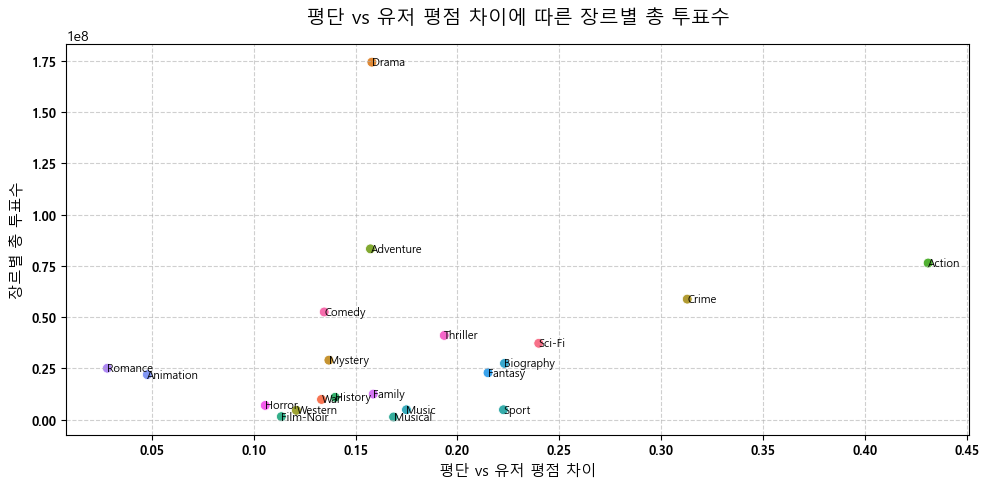

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))



sns.scatterplot(
    data=merged_ranks,
    x='diff',        # 평단-유저 차이
    y='Total_votes',# 그 장르 인기 정도
    hue='Genre',
    s=50,
    ax = ax,
    legend = False
)

sns.set_palette("mako")

plt.xlabel('평단 vs 유저 평점 차이', fontsize=11)
plt.ylabel('장르별 총 투표수', fontsize=11)

plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

plt.title('평단 vs 유저 평점 차이에 따른 장르별 총 투표수', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.6)

# 점마다 텍스트 붙이기
for idx, row in merged_ranks.iterrows():
    ax.text(
        
        x = row['diff'], 
        y = row['Total_votes'],
        s = row['Genre'],
        color='black',
        fontsize=8,
        ha='left',
        va='center'     # 점 기준 “위쪽”에 표시
    )
    
plt.tight_layout()
plt.show()


- 액션 - 장르 중 편차가 가장 큼 - 유저 / 평단따라 선호도가 극명하게 갈리는 장르
- 드라마 - 대중 관심 많고, 호불호 적게 갈리는 장르
- 로맨스 - 시청자 평점 낮은 장르 중 하나지만 의외로 편차가 적음 - 인기는 덜하지만 선호는 크게 갈리지 않는 무난한 장르

## 시청자 평점 상위 장르 두개 특징 파악

In [31]:
# 공상과학 장르 특징파악

scifi_df = genre_df[genre_df['Genre'] == 'Sci-Fi']
scifi_df = scifi_df.sort_values('IMDB_Rating', ascending=False)

In [40]:
q3_votes = scifi_df['No_of_Votes'].quantile(0.75)
print(f"Q3(75% 지점) 득표수: {q3_votes:.0f}표")
print()
print('화제성 상위 25% 이상 차지한 공상과학 분야 주요 5개 작품: \n')

filtered_sci_df = scifi_df[scifi_df['No_of_Votes'] >= q3_votes]

filtered_sci_df.sort_values(
    by='IMDB_Rating',
    ascending=False)
filtered_sci_df['Series_Title'].reset_index(drop = True).head(5)

Q3(75% 지점) 득표수: 764620표

화제성 상위 25% 이상 차지한 공상과학 분야 주요 5개 작품: 



0                     Inception
1                    The Matrix
2                  Interstellar
3                  The Prestige
4    Terminator 2: Judgment Day
Name: Series_Title, dtype: object

In [34]:
from konlpy.tag import Okt
import pandas as pd

# Overview 컬럼의 모든 텍스트를 추출
text = filtered_sci_df['Overview'].astype(str).str.lower().str.cat(sep = '')

# 불용어 리스트 정의
english_stopwords = {
    'a', 'the', 'they', 'it', 'this', 'that', 'story',
    'is', 'are', 'was', 'were', 'and', 'or', 'to', 'of', 'in', 'on', 'for', 'with', 'but',
    'from', 'by', 'as', 'at', 'i', 'he', 'she', 'him', 'her', 'we', 'us', 'you', 'your',
    'movie', 'film', 'series', 'character', 'time', 'world', 'new', 'who', 'what', 'when', 'where', 'why'
}

words = []

for word in text.split():
    word = word.strip('.,!?"\'')
    if len(word) > 1 and word not in english_stopwords:
        words.append(word)
        
processed_text = ' '.join(words)

# 5. 워드클라우드 생성 (위에서 설명한 WordCloud 객체 사용)

공상 과학 장르 주요키워드: 


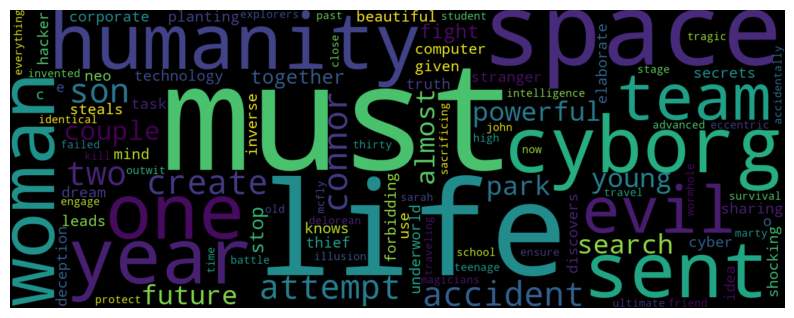

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. WordCloud 객체 생성 및 설정
wc = WordCloud(
    width=1300,
    height=500,
    background_color='black',
    max_words=100  # 최대 표시할 단어 수
)

# 2. 텍스트 데이터를 기반으로 워드클라우드 생성
wordcloud_image = wc.generate(processed_text)

print('공상 과학 장르 주요키워드: ')
# 3. 시각화 (matplotlib 사용)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off') # 축 정보 숨기기
plt.show()

In [38]:
# 전쟁장르 장르 특징파악
War_df = genre_df[genre_df['Genre'] == 'War']

q3_votes = War_df['No_of_Votes'].quantile(0.75)
print(f"Q3(75% 지점) 득표수: {q3_votes:.0f}표")

filtered_War_df = War_df[War_df['No_of_Votes'] >= q3_votes]
filtered_War_df.sort_values(
    by='IMDB_Rating',
    ascending=False)

Q3(75% 지점) 득표수: 219347표


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
24,https://m.media-amazon.com/images/M/MV5BZjhkMD...,Saving Private Ryan,1998,R,169 min,War,8.6,"Following the Normandy Landings, a group of U....",91.0,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,"216,540,909"
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,War,8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
50,https://m.media-amazon.com/images/M/MV5BY2IzZG...,Casablanca,1942,U,102 min,War,8.5,A cynical expatriate American cafe owner strug...,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,"1,024,560"
74,https://m.media-amazon.com/images/M/MV5BMDdhOD...,Apocalypse Now,1979,R,147 min,War,8.4,A U.S. Army officer serving in Vietnam is task...,94.0,Francis Ford Coppola,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,606398,"83,471,511"
84,https://m.media-amazon.com/images/M/MV5BOTdmNT...,1917,2019,R,119 min,War,8.3,"April 6th, 1917. As a regiment assembles to wa...",78.0,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,425844,"159,227,644"
93,https://m.media-amazon.com/images/M/MV5BOTJiND...,Inglourious Basterds,2009,A,153 min,War,8.3,"In Nazi-occupied France during World War II, a...",69.0,Quentin Tarantino,Brad Pitt,Diane Kruger,Eli Roth,Mélanie Laurent,1267869,"120,540,719"
104,https://m.media-amazon.com/images/M/MV5BNzkxOD...,Full Metal Jacket,1987,UA,116 min,War,8.3,A pragmatic U.S. Marine observes the dehumaniz...,76.0,Stanley Kubrick,Matthew Modine,R. Lee Ermey,Vincent D'Onofrio,Adam Baldwin,675146,"46,357,676"
150,https://m.media-amazon.com/images/M/MV5BMTU3OD...,Pan's Labyrinth,2006,UA,118 min,War,8.2,"In the Falangist Spain of 1944, the bookish yo...",98.0,Guillermo del Toro,Ivana Baquero,Ariadna Gil,Sergi López,Maribel Verdú,618623,"37,634,615"
268,https://m.media-amazon.com/images/M/MV5BMzRjZj...,Platoon,1986,A,120 min,War,8.1,"Chris Taylor, a neophyte recruit in Vietnam, f...",92.0,Oliver Stone,Charlie Sheen,Tom Berenger,Willem Dafoe,Keith David,381222,"138,530,565"
278,https://m.media-amazon.com/images/M/MV5BNDhmNT...,The Deer Hunter,1978,A,183 min,War,8.1,An in-depth examination of the ways in which t...,86.0,Michael Cimino,Robert De Niro,Christopher Walken,John Cazale,John Savage,311361,"48,979,328"


In [43]:
print("--- 화제성 상위 25% 이상 차지한 전쟁장르주요 5개 작품:  ---")
arts = filtered_War_df['Series_Title'].reset_index(drop=True).head(5)
print(arts)
print()


--- 화제성 상위 25% 이상 차지한 전쟁장르주요 5개 작품:  ---
0    Saving Private Ryan
1         Hotaru no haka
2             Casablanca
3         Apocalypse Now
4                   1917
Name: Series_Title, dtype: object



In [44]:
from konlpy.tag import Okt
import pandas as pd

# Overview 컬럼의 모든 텍스트를 추출
text = filtered_War_df['Overview'].astype(str).str.lower().str.cat(sep = '')

# 불용어 리스트 정의
english_stopwords = {
    'a', 'the', 'they', 'it', 'this', 'that', 'story',
    'is', 'are', 'was', 'were', 'and', 'or', 'to', 'of', 'in', 'on', 'for', 'with', 'but',
    'from', 'by', 'as', 'at', 'i', 'he', 'she', 'him', 'her', 'we', 'us', 'you', 'your',
    'movie', 'film', 'series', 'character', 'time', 'world', 'new', 'who', 'what', 'when', 'where', 'why'
}

words = []

for word in text.split():
    word = word.strip('.,!?"\'')
    if len(word) > 1 and word not in english_stopwords:
        words.append(word)
        
processed_text = ' '.join(words)

# 5. 워드클라우드 생성 (위에서 설명한 WordCloud 객체 사용)

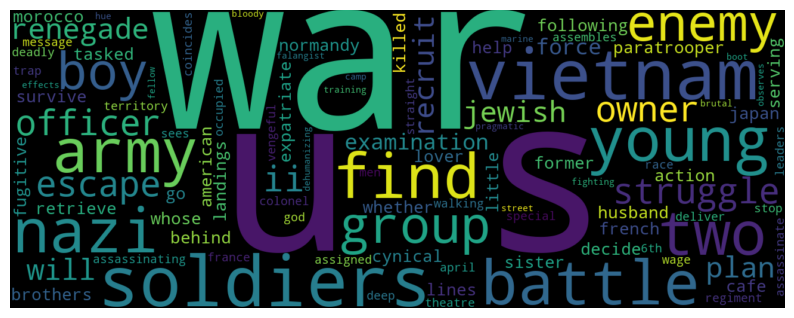

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. WordCloud 객체 생성 및 설정
wc = WordCloud(
    width=1300,
    height=500,
    background_color='black',
    max_words=100  # 최대 표시할 단어 수
)

# 2. 텍스트 데이터를 기반으로 워드클라우드 생성
wordcloud_image = wc.generate(processed_text)

# 3. 시각화 (matplotlib 사용)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off') # 축 정보 숨기기
plt.show()

## 평단 선호 장르 분석

In [47]:
critic_genres = ['Romance','Animation']

print('메타평점 상위 2개 장르 ')
print()

for g in critic_genres:
    gdf = genre_df[genre_df['Genre'] == g]
    gdf = gdf.sort_values('Meta_score', ascending=False)

    print(f"--- {g} 장르 상위 5개 작품 ---")
    arts = gdf['Series_Title'].reset_index(drop=True).head(5)
    print(arts)
    print()


메타평점 상위 2개 장르 

--- Romance 장르 상위 5개 작품 ---
0               Casablanca
1                  Vertigo
2    Trois couleurs: Rouge
3                Notorious
4      Singin' in the Rain
Name: Series_Title, dtype: object

--- Animation 장르 상위 5개 작품 ---
0    Sen to Chihiro no kamikakushi
1                         Fantasia
2                      Ratatouille
3                        Toy Story
4             Beauty and the Beast
Name: Series_Title, dtype: object



🔑 Romance 장르 주요 키워드 Top 20
his: 65
an: 42
young: 29
love: 27
their: 25
woman: 23
man: 20
two: 16
life: 14
after: 13
each: 11
will: 10
has: 10
be: 10
one: 10
falls: 10
finds: 10
up: 9
other: 9
wife: 9
----------------------------------------


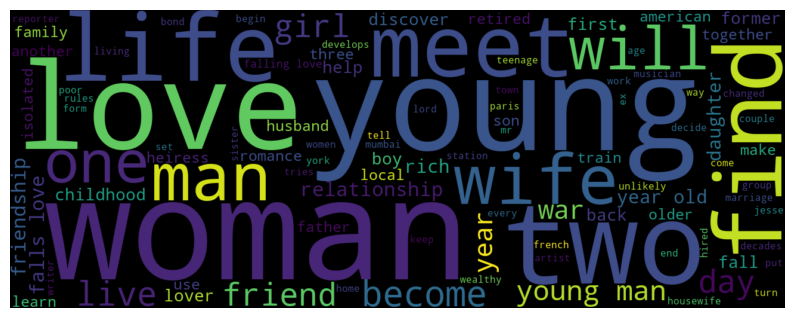

🔑 Animation 장르 주요 키워드 Top 20
his: 33
an: 23
young: 23
girl: 14
their: 14
be: 10
out: 9
boy: 9
must: 9
into: 8
up: 8
after: 7
life: 6
home: 6
while: 6
save: 6
princess: 6
two: 6
find: 6
during: 5
----------------------------------------


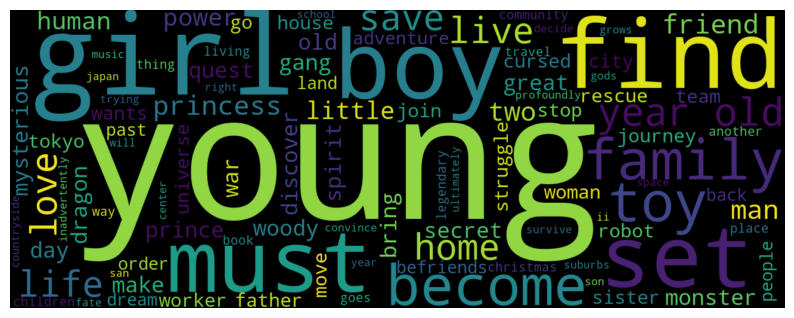

In [48]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

for g in critic_genres:
    # 해당 장르 영화만 출
    gdf = genre_df[genre_df['Genre'] == g].copy()
    gdf = gdf.sort_values('Meta_score', ascending=False)  # 필요하면 유지

    # Overview 전부 이어 붙이기 (소문자 + 공백 구분)
    text = gdf['Overview'].astype(str).str.lower().str.cat(sep=' ')



    # 불용어 리스트 정의
    english_stopwords = {
        'a', 'the', 'they', 'it', 'this', 'that', 'story',
        'is', 'are', 'was', 'were', 'and', 'or', 'to', 'of', 'in', 'on', 'for', 'with', 'but',
        'from', 'by', 'as', 'at', 'i', 'he', 'she', 'him', 'her', 'we', 'us', 'you', 'your',
        'movie', 'film', 'series', 'character', 'time', 'world', 'new', 'who', 'what', 'when', 'where', 'why'
    }
    
    words = []
    
    for word in text.split():
        word = word.strip('.,!?"\'')
        if len(word) > 1 and word not in english_stopwords:
            words.append(word)

    counter = Counter(words)
    top_keywords = counter.most_common(20)

    print(f'🔑 {g} 장르 주요 키워드 Top 20')
    for w, c in top_keywords:
        print(f'{w}: {c}')
    print('-' * 40)
    processed_text = ' '.join(words)

# 5. 워드클라우드 생성 (위에서 설명한 WordCloud 객체 사용)

    # 1. WordCloud 객체 생성 및 설정
    wc = WordCloud(
        width=1300,
        height=500,
        background_color='black',
        max_words=100  # 최대 표시할 단어 수
    )
    
    # 2. 텍스트 데이터를 기반으로 워드클라우드 생성
    wordcloud_image = wc.generate(processed_text)
    
    # 3. 시각화 (matplotlib 사용)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_image, interpolation='bilinear')
    plt.axis('off') # 축 정보 숨기기
    plt.show()